In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("Dataset/baseline_data.csv")
test = pd.read_csv("Dataset/baseline_data_test.csv")

In [6]:
np.sort(train["id_jalan"].unique())

array([     1210,   3688059,   3691841,   4004732,   4060819,   4061596,
         4898588,   8504977,  22932408,  24704286,  26785612,  40044423,
        47010584,  50841260,  66924592,  97453767, 142479648, 150783571,
       182210371, 691007296], dtype=int64)

In [198]:
train

,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,Date,Hour,road_type,node_awal_ways,node_akhir_ways,road_relation,road_node,max_speed,type_highway
0,691007296,21390008,1425033102,29.126,1,1,Road,3.0,3.0,13,5,30,trunk
1,47010584,1677092762,579493410,46.576,1,1,Road,3.0,2.0,10,53,30,primary
2,22932408,26486694,1930267566,36.587,1,1,Lane,3.0,2.0,4,62,20,secondary
3,142479648,1111592522,3775231113,34.063,1,1,Hill,2.0,2.0,11,12,20,primary
4,8504977,5940503398,5940503394,38.336,1,1,Road,2.0,2.0,4,3,30,primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398643,3691841,18235127,1590448416,41.094,22,23,Road,2.0,2.0,8,29,30,trunk
398644,3691841,1250564256,18293380,45.902,22,23,Road,2.0,3.0,8,29,30,trunk
398645,182210371,33139383,33139375,38.918,22,23,Side,3.0,2.0,13,11,30,trunk
398646,8504977,1623682036,26467191,34.951,22,23,Road,3.0,2.0,4,3,30,primary


In [199]:
test

,id,id_jalan,id_titik_mulai,id_titik_akhir,Date,Hour,road_type,node_awal_ways,node_akhir_ways,road_relation,road_node,max_speed,type_highway
0,0,4004732,32046542,6454026544,23,0,West,3.0,3.0,9,7,30,trunk
1,1,182210371,1314925464,1314925496,23,0,Side,2.0,2.0,13,11,30,trunk
2,2,22932408,1482086782,26481020,23,0,Lane,2.0,2.0,4,62,20,secondary
3,3,182210371,3892883,267337489,23,0,Side,2.0,2.0,13,11,30,trunk
4,4,66924592,266041030,2592978110,23,0,Road,2.0,3.0,25,34,30,trunk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127484,127484,8504977,2378878,4712485405,29,23,Road,4.0,NaN,4,3,30,primary
127485,127485,26785612,265111477,106201,29,23,Street,2.0,4.0,3,11,20,primary
127486,127486,47010584,196038,1677146686,29,23,Road,2.0,2.0,10,53,30,primary
127487,127487,22932408,873733547,1692210206,29,23,Lane,2.0,2.0,4,62,20,secondary


In [200]:
train.isna().sum()[train.isna().sum()>0]

node_awal_ways     15106
node_akhir_ways    14909
dtype: int64

In [201]:
test.isna().sum()[test.isna().sum()>0]

node_awal_ways     4827
node_akhir_ways    4765
dtype: int64

In [202]:
mapping = {
    1: "Saturday",
    2: "Sunday",
    3: "Monday",
    4: "Tuesday",
    5: "Wednesday",
    6: "Thursday",
    7: "Friday",
    8: "Saturday",
    9: "Sunday",
    10: "Monday",
    11: "Tuesday",
    12: "Wednesday",
    13: "Thursday",
    14: "Friday",
    15: "Saturday",
    16: "Sunday",
    17: "Monday",
    18: "Tuesday",
    19: "Wednesday",
    20: "Thursday",
    21: "Friday",
    22: "Saturday",
    23: "Sunday",
    24: "Monday",
    25: "Tuesday",
    26: "Wednesday",
    27: "Thursday",
    28: "Friday",
    29: "Saturday"
}

train["Day"] = train["Date"].map(mapping)
test["Day"] = test["Date"].map(mapping)

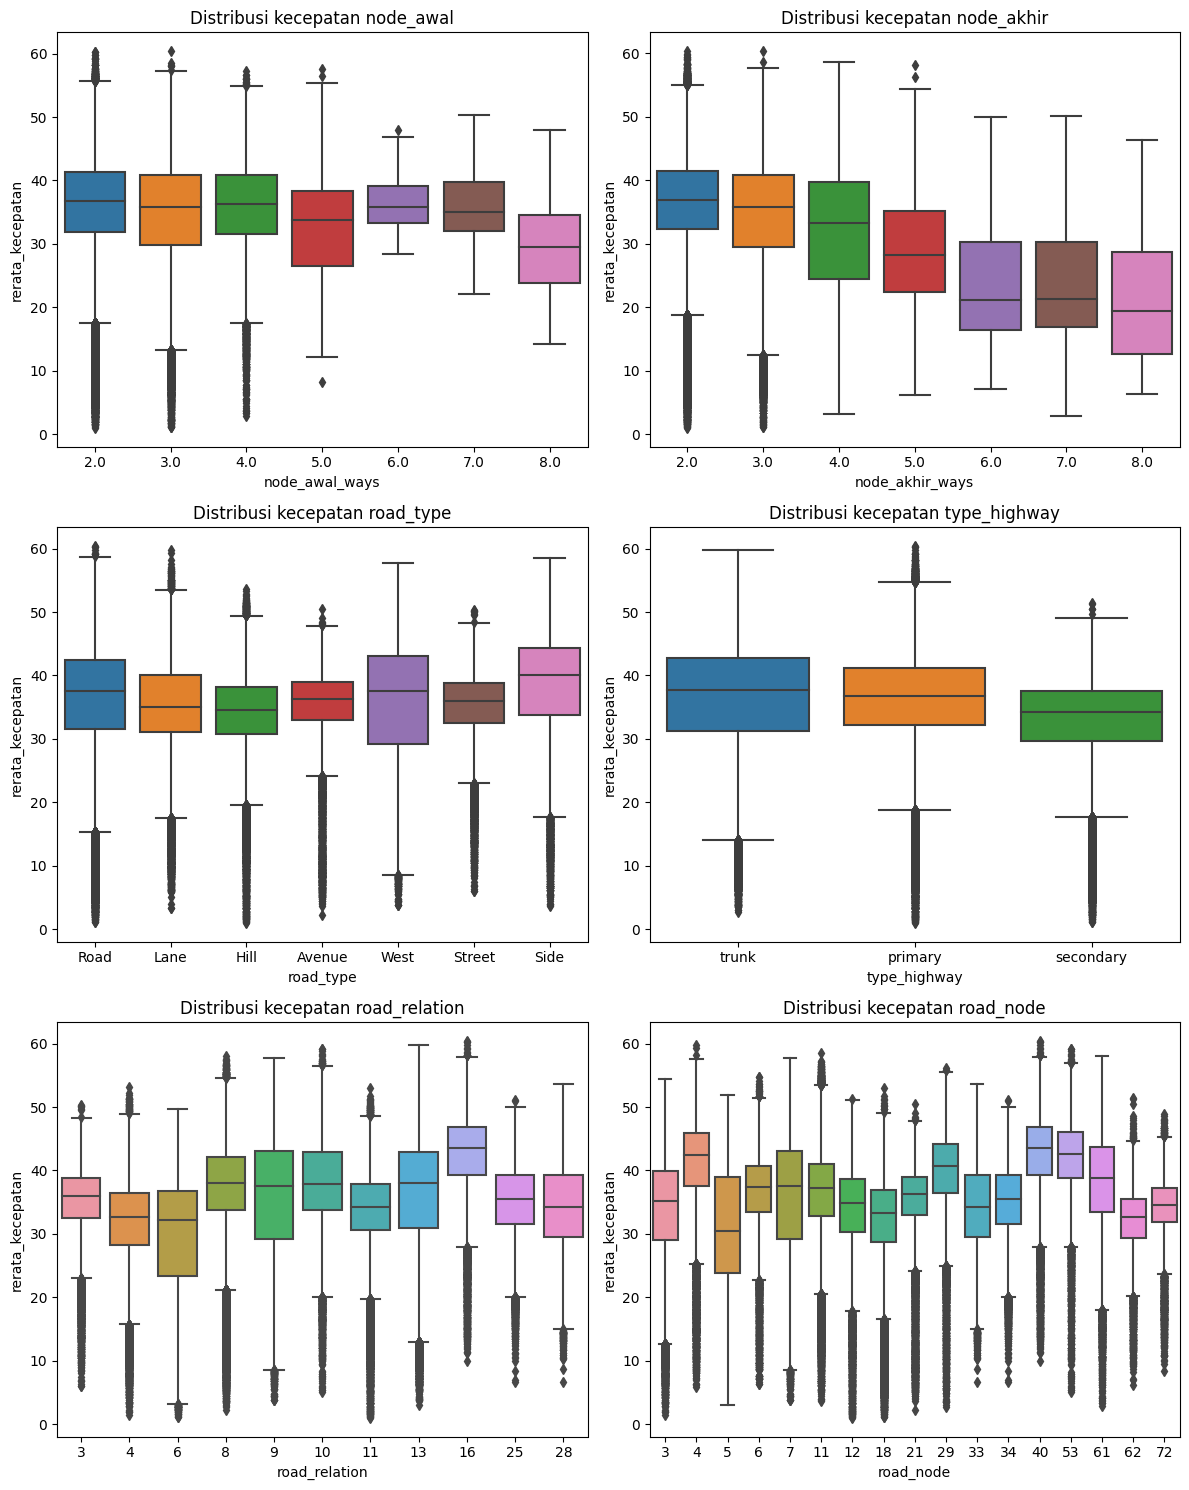

In [203]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# Subplot 1: Distribusi kecepatan node_awal
sns.boxplot(data=train, x="node_awal_ways", y="rerata_kecepatan", ax=axes[0, 0])
axes[0, 0].set_title("Distribusi kecepatan node_awal")

# Subplot 2: Distribusi kecepatan node_akhir
sns.boxplot(data=train, x="node_akhir_ways", y="rerata_kecepatan", ax=axes[0, 1])
axes[0, 1].set_title("Distribusi kecepatan node_akhir")

# Subplot 3: Distribusi kecepatan road_type
sns.boxplot(data=train, x="road_type", y="rerata_kecepatan", ax=axes[1, 0])
axes[1, 0].set_title("Distribusi kecepatan road_type")

# Subplot 4: Distribusi kecepatan type_highway
sns.boxplot(data=train, x="type_highway", y="rerata_kecepatan", ax=axes[1, 1])
axes[1, 1].set_title("Distribusi kecepatan type_highway")

# Subplot 5: Distribusi kecepatan road_relation
sns.boxplot(data=train, x="road_relation", y="rerata_kecepatan", ax=axes[2, 0])
axes[2, 0].set_title("Distribusi kecepatan road_relation")

# Subplot 6: Distribusi kecepatan road_node
sns.boxplot(data=train, x="road_node", y="rerata_kecepatan", ax=axes[2, 1])
axes[2, 1].set_title("Distribusi kecepatan road_node")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


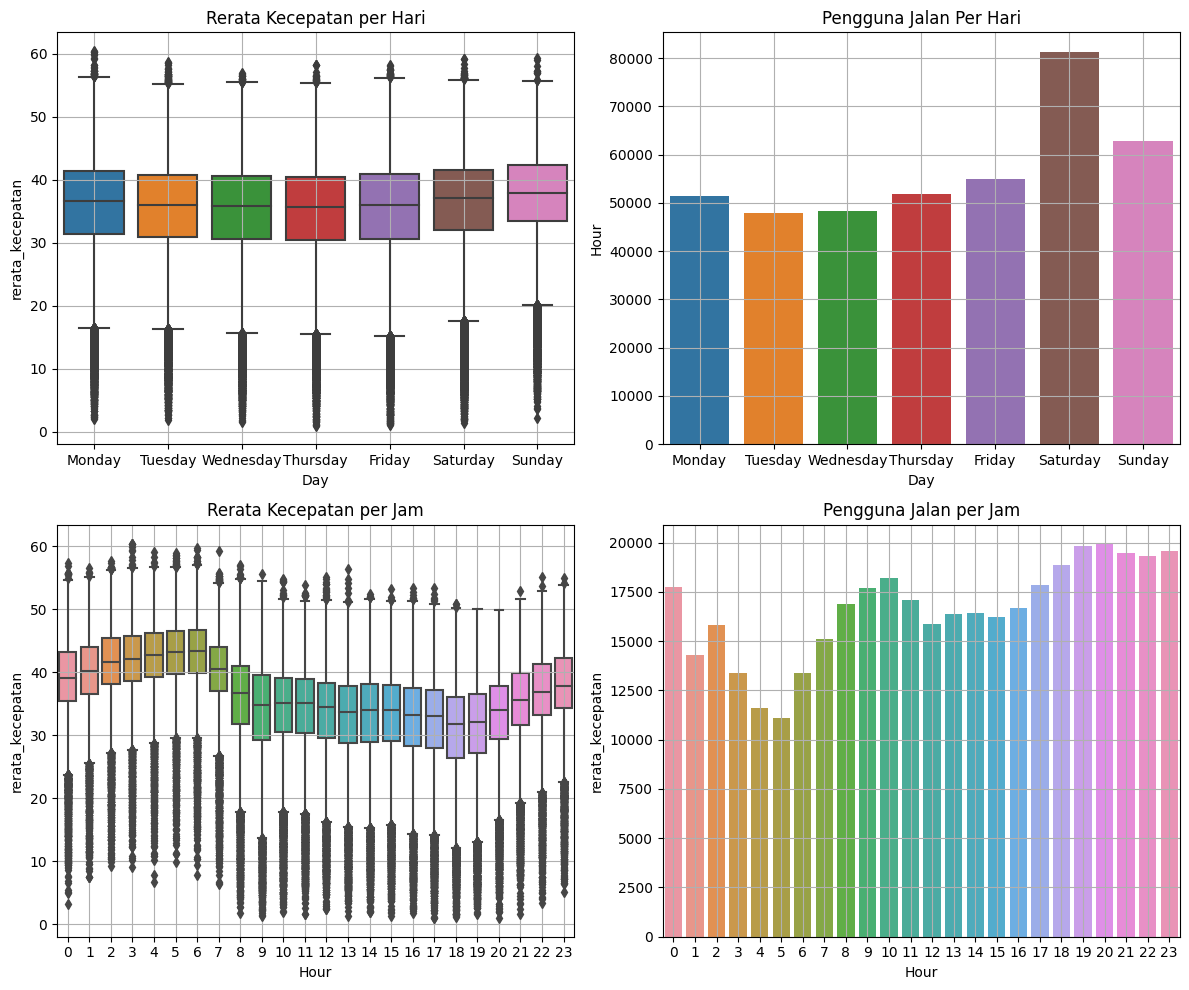

In [204]:
# Step 1: Group data by "Day" and calculate the mean and count for each day
grouped_data = train.groupby("Day").agg({"rerata_kecepatan": "mean", "Hour": "count"})
desired_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sorted_grouped_data = grouped_data.reindex(desired_order)

# Create the figure and subplots
plt.figure(figsize=(12, 10))

# Subplot 1: Rerata Kecepatan per Hari
plt.subplot(2, 2, 1)
plt.title("Rerata Kecepatan per Hari")
sns.boxplot(data=train, x="Day", y="rerata_kecepatan", order=desired_order)
plt.grid()

# Subplot 2: Pengguna Jalan Per Hari
plt.subplot(2, 2, 2)
plt.title("Pengguna Jalan Per Hari")
sns.barplot(data=sorted_grouped_data, x=sorted_grouped_data.index, y="Hour", order=desired_order)
plt.grid()

# Subplot 3: Rerata Kecepatan per Jam
plt.subplot(2, 2, 3)
plt.title("Rerata Kecepatan per Jam")
sns.boxplot(data=train, x="Hour", y="rerata_kecepatan")
plt.grid()

# Subplot 4: Pengguna Jalan per Jam
plt.subplot(2, 2, 4)
plt.title("Pengguna Jalan per Jam")
sns.barplot(data=train.groupby("Hour").count().reset_index(), x="Hour", y="rerata_kecepatan")
plt.grid()

plt.tight_layout()
plt.show()

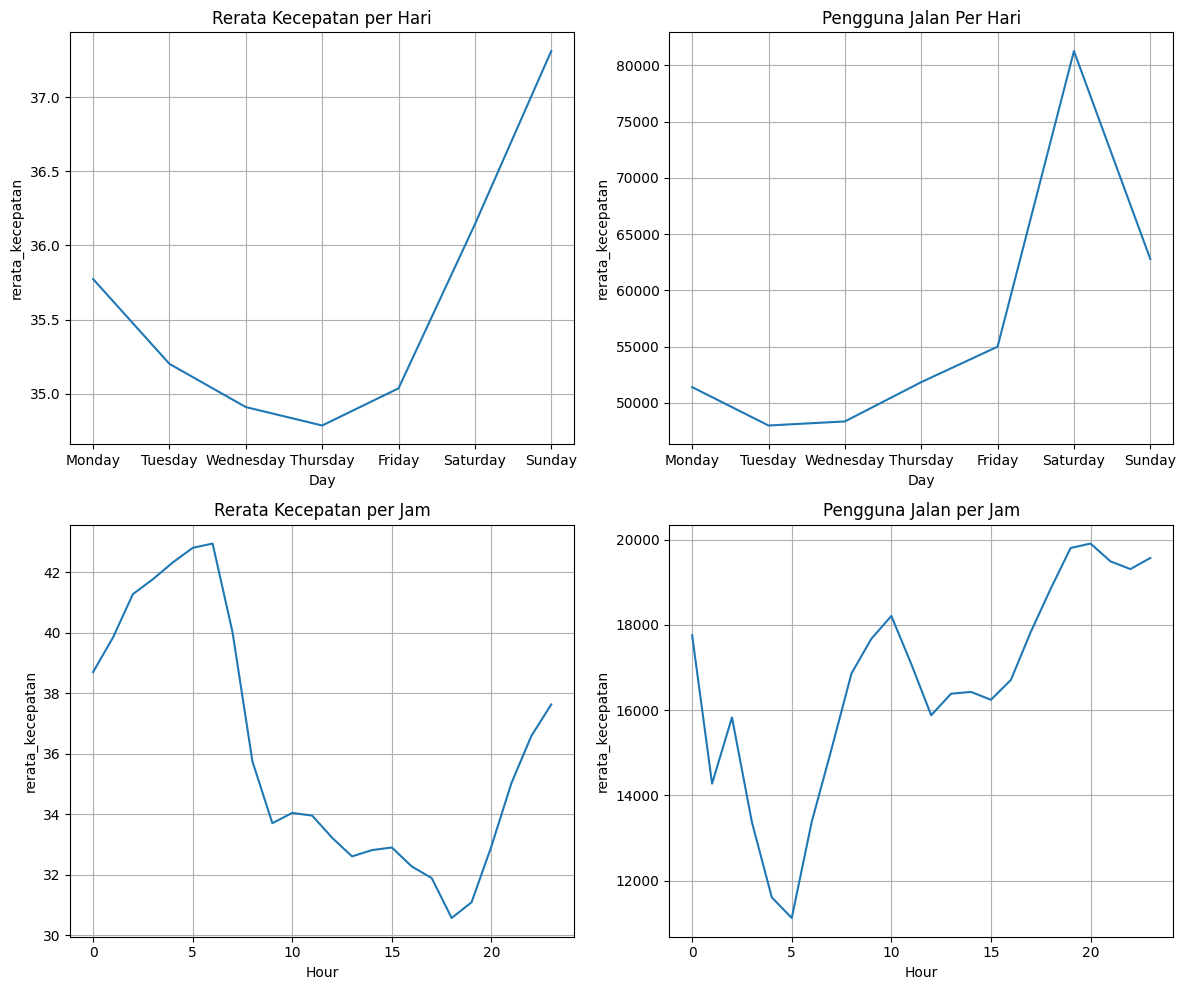

In [205]:
# Step 1: Group data by "Day" and calculate the mean and count for each day
grouped_data_mean = train.groupby("Day").mean()
grouped_data_count = train.groupby("Day").count()

# Step 2: Define the desired order of days
desired_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Step 3: Sort the index using the desired order
sorted_grouped_data_mean = grouped_data_mean.reindex(desired_order)
sorted_grouped_data_count = grouped_data_count.reindex(desired_order)

# Create the figure and subplots
plt.figure(figsize=(12, 10))

# Subplot 1: Rerata Kecepatan per Hari
plt.subplot(2, 2, 1)
plt.title("Rerata Kecepatan per Hari")
sns.lineplot(data=sorted_grouped_data_mean, x=sorted_grouped_data_mean.index, y="rerata_kecepatan")
plt.grid()

# Subplot 2: Pengguna Jalan Per Hari
plt.subplot(2, 2, 2)
plt.title("Pengguna Jalan Per Hari")
sns.lineplot(data=sorted_grouped_data_count, x=sorted_grouped_data_count.index, y="rerata_kecepatan")
plt.grid()

# Subplot 3: Rerata Kecepatan per Jam
plt.subplot(2, 2, 3)
plt.title("Rerata Kecepatan per Jam")
sns.lineplot(data=train.groupby("Hour").mean().reset_index(), x="Hour", y="rerata_kecepatan")
plt.grid()

# Subplot 4: Pengguna Jalan per Jam
plt.subplot(2, 2, 4)
plt.title("Pengguna Jalan per Jam")
sns.lineplot(data=train.groupby("Hour").count().reset_index(), x="Hour", y="rerata_kecepatan")
plt.grid()

plt.tight_layout()
plt.show()

In [206]:
train['id_jalan_id_titik_mulai_id_titik_akhir'] = train.apply(lambda row: f"{int(row['id_jalan'])}_{int(row['id_titik_mulai'])}_{int(row['id_titik_akhir'])}", axis=1)
test['id_jalan_id_titik_mulai_id_titik_akhir'] = test.apply(lambda row: f"{int(row['id_jalan'])}_{int(row['id_titik_mulai'])}_{int(row['id_titik_akhir'])}", axis=1)

In [207]:
for col in test.columns:
    if col == 'id':
        continue
    if len(set(train[col]).difference(test[col])) != 0:
        print("column:", col)
        print("Unique value berbeda yang ada di train tapi tidak ada di test adalah:", set(train[col]).difference(test[col]))

column: Date
Unique value berbeda yang ada di train tapi tidak ada di test adalah: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}
column: node_awal_ways
Unique value berbeda yang ada di train tapi tidak ada di test adalah: {nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

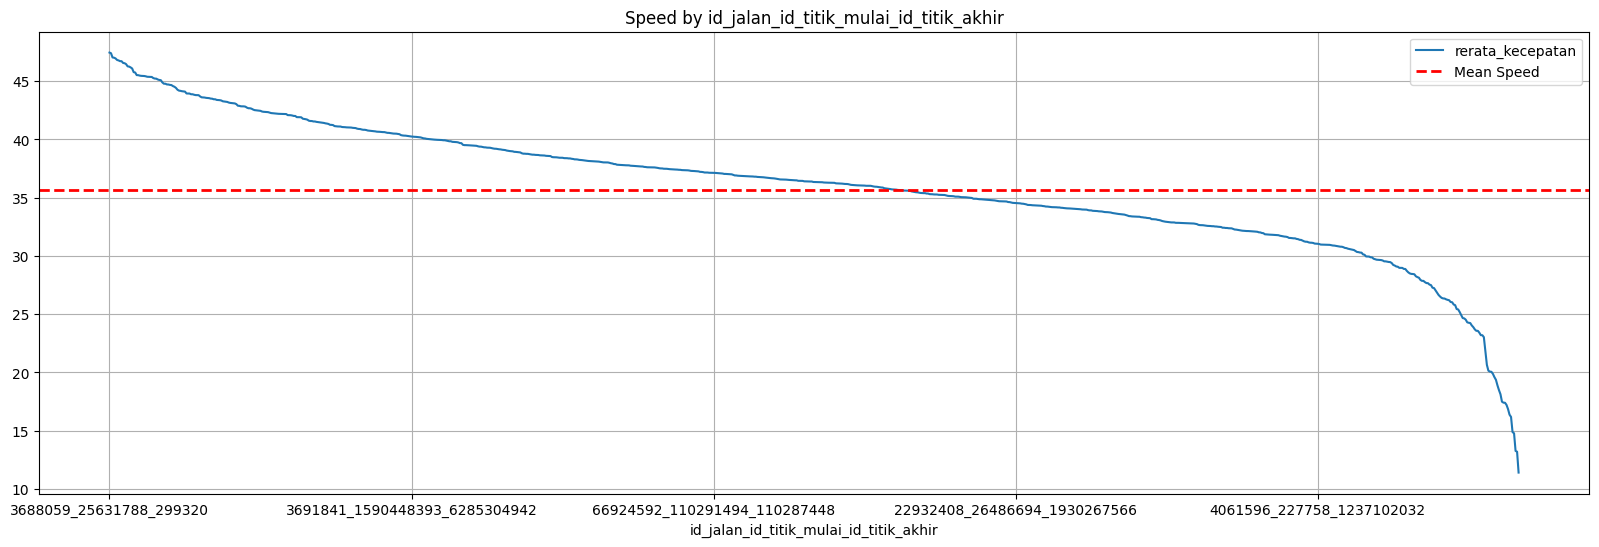

In [208]:
# Calculate the mean value
mean_speed = train["rerata_kecepatan"].mean()

# Plot the data
plt.figure(figsize=(20, 6))
plt.title("Speed by id_jalan_id_titik_mulai_id_titik_akhir")
train.groupby("id_jalan_id_titik_mulai_id_titik_akhir").mean()["rerata_kecepatan"].sort_values(ascending=False).plot()
plt.grid()

# Add horizontal line for the mean
plt.axhline(mean_speed, color='red', linestyle='dashed', linewidth=2, label='Mean Speed')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [209]:
train["node_awal_ways_minus_node_akhir_ways"] = train["node_awal_ways"] - train["node_akhir_ways"]
test["node_awal_ways_minus_node_akhir_ways"] = test["node_awal_ways"] - test["node_akhir_ways"]

<AxesSubplot:xlabel='node_awal_ways_minus_node_akhir_ways', ylabel='rerata_kecepatan'>

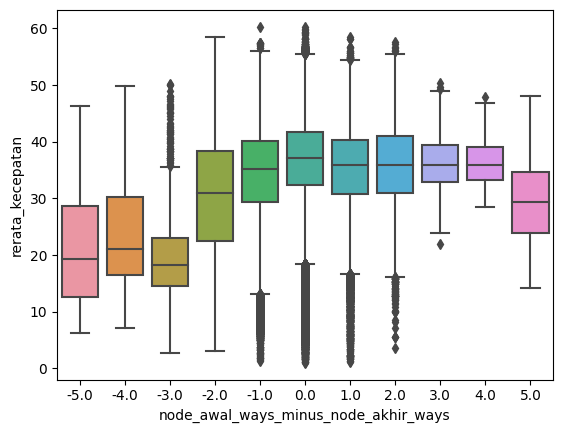

In [210]:
sns.boxplot(data=train, x="node_awal_ways_minus_node_akhir_ways", y="rerata_kecepatan")

<AxesSubplot:xlabel='max_speed'>

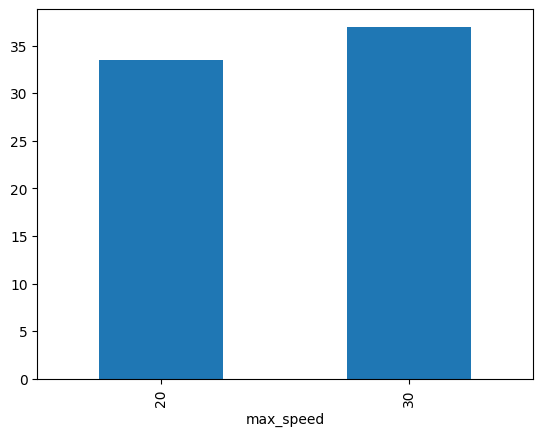

In [211]:
train.groupby("max_speed").mean()["rerata_kecepatan"].plot(kind='bar')

In [212]:
np.sort(train["id_jalan"].unique())

array([     1210,   3688059,   3691841,   4004732,   4060819,   4061596,
         4898588,   8504977,  22932408,  24704286,  26785612,  40044423,
        47010584,  50841260,  66924592,  97453767, 142479648, 150783571,
       182210371, 691007296], dtype=int64)

In [213]:
np.sort(train["id_titik_mulai"].unique())[:30]

array([101831, 106201, 106203, 195849, 195850, 195854, 195855, 196019,
       196026, 196033, 196034, 196035, 196038, 196039, 196049, 196050,
       196051, 196052, 196053, 196054, 196055, 196143, 196693, 196697,
       199878, 227710, 227728, 227729, 227730, 227756], dtype=int64)

In [214]:
np.sort(train["id_titik_akhir"].unique())[:30]

array([101831, 106201, 106203, 195849, 195850, 195854, 195855, 196019,
       196026, 196033, 196034, 196035, 196038, 196039, 196049, 196050,
       196051, 196052, 196053, 196054, 196055, 196143, 196693, 196697,
       199878, 227710, 227728, 227729, 227730, 227756], dtype=int64)

In [215]:
def extract_first_three_digits(number):
    number_str = str(number)
    first_three_digits = number_str[:3]
    return int(first_three_digits)

def extract_first_five_digits(number):
    number_str = str(number)
    first_three_digits = number_str[:4]
    return int(first_three_digits)


train['id_jalan_3'] = train['id_jalan'].apply(extract_first_three_digits)
train['id_titik_mulai_4'] = train['id_titik_mulai'].apply(extract_first_five_digits)
train['id_titik_akhir_4'] = train['id_titik_akhir'].apply(extract_first_five_digits)

test['id_jalan_3'] = test['id_jalan'].apply(extract_first_three_digits)
test['id_titik_mulai_4'] = test['id_titik_mulai'].apply(extract_first_five_digits)
test['id_titik_akhir_4'] = test['id_titik_akhir'].apply(extract_first_five_digits)

<AxesSubplot:xlabel='id_jalan_3', ylabel='rerata_kecepatan'>

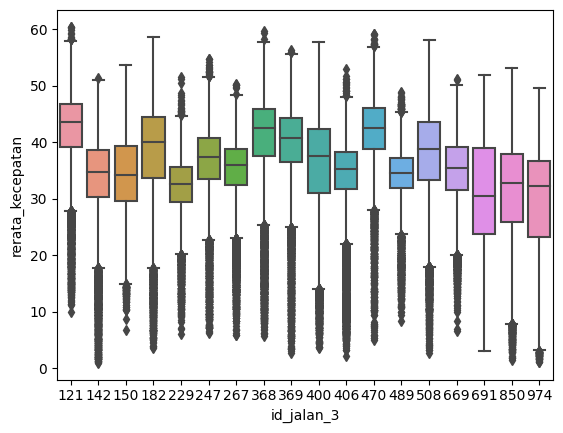

In [216]:
sns.boxplot(data=train, x="id_jalan_3", y="rerata_kecepatan")

<AxesSubplot:xlabel='id_titik_mulai_4', ylabel='rerata_kecepatan'>

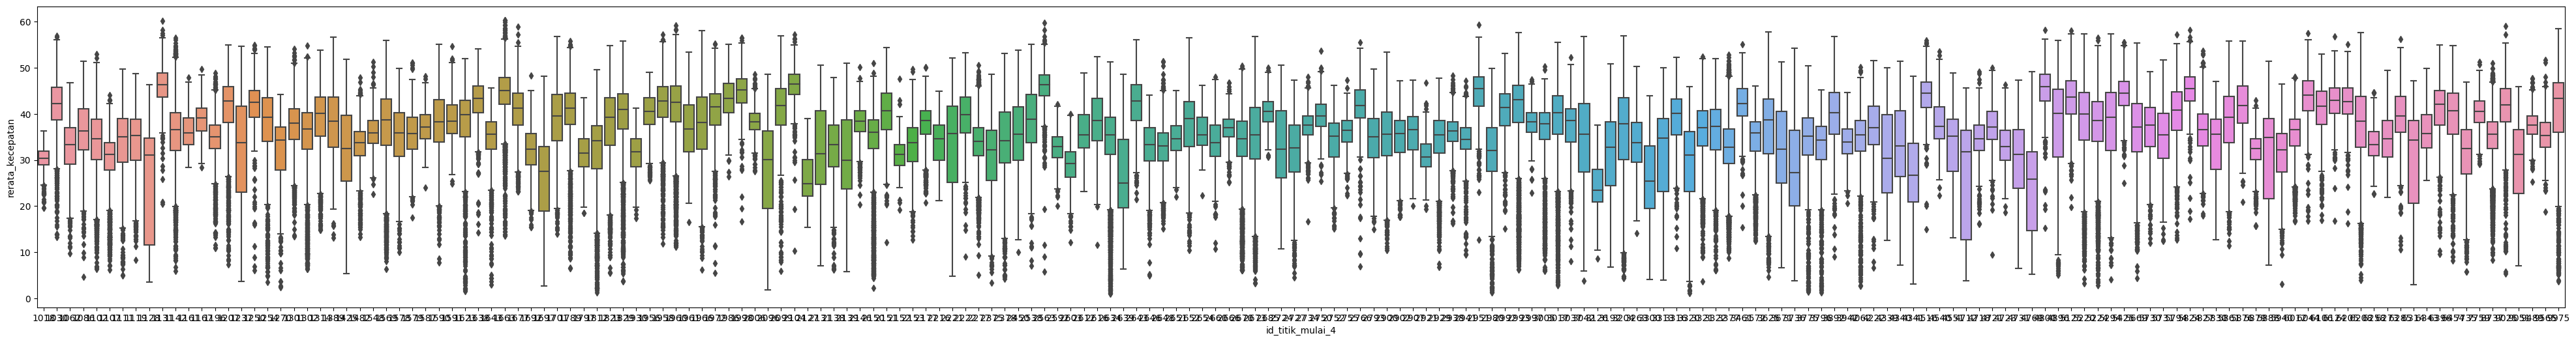

In [219]:
plt.figure(figsize=(50,6))
sns.boxplot(data=train, x="id_titik_mulai_4", y="rerata_kecepatan")

In [186]:
col_to_drop = train.columns[:3].tolist()

train = train.drop(col_to_drop, axis=1)
test = test.drop(col_to_drop, axis=1)

In [187]:
train.head()

,rerata_kecepatan,Date,Hour,road_type,node_awal_ways,node_akhir_ways,road_relation,road_node,max_speed,type_highway,Day,id_jalan_id_titik_mulai_id_titik_akhir,node_awal_ways_minus_node_akhir_ways,id_jalan_3,id_titik_mulai_3,id_titik_akhir_3
0,29.126,1,1,Road,3.0,3.0,13,5,30,trunk,Saturday,691007296_21390008_1425033102,0.0,691,2139,1425
1,46.576,1,1,Road,3.0,2.0,10,53,30,primary,Saturday,47010584_1677092762_579493410,1.0,470,1677,5794
2,36.587,1,1,Lane,3.0,2.0,4,62,20,secondary,Saturday,22932408_26486694_1930267566,1.0,229,2648,1930
3,34.063,1,1,Hill,2.0,2.0,11,12,20,primary,Saturday,142479648_1111592522_3775231113,0.0,142,1111,3775
4,38.336,1,1,Road,2.0,2.0,4,3,30,primary,Saturday,8504977_5940503398_5940503394,0.0,850,5940,5940


In [188]:
test.head()

,id,Date,Hour,road_type,node_awal_ways,node_akhir_ways,road_relation,road_node,max_speed,type_highway,Day,id_jalan_id_titik_mulai_id_titik_akhir,node_awal_ways_minus_node_akhir_ways,id_jalan_3,id_titik_mulai_3,id_titik_akhir_3
0,0,23,0,West,3.0,3.0,9,7,30,trunk,Sunday,4004732_32046542_6454026544,0.0,400,3204,6454
1,1,23,0,Side,2.0,2.0,13,11,30,trunk,Sunday,182210371_1314925464_1314925496,0.0,182,1314,1314
2,2,23,0,Lane,2.0,2.0,4,62,20,secondary,Sunday,22932408_1482086782_26481020,0.0,229,1482,2648
3,3,23,0,Side,2.0,2.0,13,11,30,trunk,Sunday,182210371_3892883_267337489,0.0,182,3892,2673
4,4,23,0,Road,2.0,3.0,25,34,30,trunk,Sunday,66924592_266041030_2592978110,-1.0,669,2660,2592


In [189]:
# ordinal encoding 
mapping = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7
}


train["Day"] = train["Day"].map(mapping)
test["Day"] = test["Day"].map(mapping)

In [190]:
y = train["rerata_kecepatan"]
train, test = train.align(test, join='inner', axis=1)
train["rerata_kecepatan"] = y

In [191]:
train.to_csv("Dataset/train_with_ext_no_ohe_digits.csv", index=False)
test.to_csv("Dataset/test_with_ext_no_ohe_digits.csv", index=False)

In [ ]:
# # ohe
# col_to_ohe = ["road_type", "type_highway", "id_jalan_id_titik_mulai_id_titik_akhir"]

# train = pd.get_dummies(train, columns=col_to_ohe)
# test = pd.get_dummies(test, columns=col_to_ohe)

# y = train["rerata_kecepatan"]
# train, test = train.align(test, join='inner', axis=1)
# train["rerata_kecepatan"] = y

# print('Training shape: ', train.shape)
# print('Testing shape: ', test.shape)